<a href="https://colab.research.google.com/github/mythuy520/Cuoi_ki/blob/main/nhac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/P/Train', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 700 images belonging to 16 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/P/Validation', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 0 images belonging to 0 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
dict = list(training_set.class_indices.keys())
training_set.class_indices

{'Cong Chieng': 0,
 'Dan Gao': 1,
 "Dan T'Rung": 2,
 'Dan bau': 3,
 'Dan da': 4,
 'Dan day': 5,
 'Dan doan': 6,
 'Dan nguyet': 7,
 'Dan sen': 8,
 'Dan tranh': 9,
 'Dan ty ba': 10,
 'Khen': 11,
 'Sao truc': 12,
 'Senh tien': 13,
 'Song loan': 14,
 'Trong': 15}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(400,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 75, 64)      0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 3.1210 - accuracy: 0.0657 

22/22 [==============================] - 443s 19s/step - loss: 3.1210 - accuracy: 0.0657
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 2.7470 - accuracy: 0.0914

22/22 [==============================] - 28s 1s/step - loss: 2.7470 - accuracy: 0.0914
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 2.7439 - accuracy: 0.0857

22/22 [==============================] - 29s 1s/step - loss: 2.7439 - accuracy: 0.0857
Epoch 4/100
22/22 [==============================] - ETA: 0s - loss: 2.7450 - accuracy: 0.0743

22/22 [==============================] - 28s 1s/step - loss: 2.7450 - accuracy: 0.0743
Epoch 5/100
22/22 [==============================] - ETA: 0s - loss: 2.7358 - accuracy: 0.0829

22/22 [==============================] - 28s 1s/step - loss: 2.7358 - accuracy: 0.0829
Epoch 6/100
22/22 [==============================] - ETA: 0s - loss: 2.7400 - accuracy: 0.0700

22/22 [==============================] - 28s 1s/step - loss: 2.7400 - accuracy: 0.0700
Epoch 7/100
22/22 [==============================] - ETA: 0s - loss: 2.7398 - accuracy: 0.0900

22/22 [==============================] - 27s 1s/step - loss: 2.7398 - accuracy: 0.0900
Epoch 8/100
22/22 [==============================] - ETA: 0s - loss: 2.7388 - accuracy: 0.0771

22/22 [==============================] - 28s 1s/step - loss: 2.7388 - accuracy: 0.0771
Epoch 9/100
22/22 [==============================] - ETA: 0s - loss: 2.7311 - accuracy: 0.1000

22/22 [==============================] - 29s 1s/step - loss: 2.7311 - accuracy: 0.1000
Epoch 10/100
22/22 [==============================] - ETA: 0s - loss: 2.7316 - accuracy: 0.0786

22/22 [==============================] - 28s 1s/step - loss: 2.7316 - accuracy: 0.0786
Epoch 11/100
22/22 [==============================] - ETA: 0s - loss: 2.7332 - accuracy: 0.0943

22/22 [==============================] - 27s 1s/step - loss: 2.7332 - accuracy: 0.0943
Epoch 12/100
22/22 [==============================] - ETA: 0s - loss: 2.7408 - accuracy: 0.0857

22/22 [==============================] - 28s 1s/step - loss: 2.7408 - accuracy: 0.0857
Epoch 13/100
22/22 [==============================] - ETA: 0s - loss: 2.7356 - accuracy: 0.0871

22/22 [==============================] - 27s 1s/step - loss: 2.7356 - accuracy: 0.0871
Epoch 14/100
22/22 [==============================] - ETA: 0s - loss: 2.7367 - accuracy: 0.0829

22/22 [==============================] - 27s 1s/step - loss: 2.7367 - accuracy: 0.0829
Epoch 15/100
22/22 [==============================] - ETA: 0s - loss: 2.7944 - accuracy: 0.0914

22/22 [==============================] - 28s 1s/step - loss: 2.7944 - accuracy: 0.0914
Epoch 16/100
22/22 [==============================] - ETA: 0s - loss: 2.7526 - accuracy: 0.0914

22/22 [==============================] - 29s 1s/step - loss: 2.7526 - accuracy: 0.0914
Epoch 17/100
22/22 [==============================] - ETA: 0s - loss: 2.7408 - accuracy: 0.0700

22/22 [==============================] - 28s 1s/step - loss: 2.7408 - accuracy: 0.0700
Epoch 18/100
22/22 [==============================] - ETA: 0s - loss: 2.7391 - accuracy: 0.0843

22/22 [==============================] - 28s 1s/step - loss: 2.7391 - accuracy: 0.0843
Epoch 19/100
22/22 [==============================] - ETA: 0s - loss: 2.7331 - accuracy: 0.0800

22/22 [==============================] - 27s 1s/step - loss: 2.7331 - accuracy: 0.0800
Epoch 20/100
22/22 [==============================] - ETA: 0s - loss: 2.7353 - accuracy: 0.0771

22/22 [==============================] - 28s 1s/step - loss: 2.7353 - accuracy: 0.0771
Epoch 21/100
22/22 [==============================] - ETA: 0s - loss: 2.7285 - accuracy: 0.0857

22/22 [==============================] - 28s 1s/step - loss: 2.7285 - accuracy: 0.0857
Epoch 22/100
22/22 [==============================] - ETA: 0s - loss: 2.7347 - accuracy: 0.0886

22/22 [==============================] - 29s 1s/step - loss: 2.7347 - accuracy: 0.0886
Epoch 23/100
22/22 [==============================] - ETA: 0s - loss: 2.7205 - accuracy: 0.1086

22/22 [==============================] - 28s 1s/step - loss: 2.7205 - accuracy: 0.1086
Epoch 24/100
22/22 [==============================] - ETA: 0s - loss: 2.7173 - accuracy: 0.1086

22/22 [==============================] - 27s 1s/step - loss: 2.7173 - accuracy: 0.1086
Epoch 25/100
22/22 [==============================] - ETA: 0s - loss: 2.6765 - accuracy: 0.1229

22/22 [==============================] - 27s 1s/step - loss: 2.6765 - accuracy: 0.1229
Epoch 26/100
22/22 [==============================] - ETA: 0s - loss: 2.6011 - accuracy: 0.1529

22/22 [==============================] - 28s 1s/step - loss: 2.6011 - accuracy: 0.1529
Epoch 27/100
22/22 [==============================] - ETA: 0s - loss: 2.4651 - accuracy: 0.2471

22/22 [==============================] - 27s 1s/step - loss: 2.4651 - accuracy: 0.2471
Epoch 28/100
22/22 [==============================] - ETA: 0s - loss: 2.3045 - accuracy: 0.2729

22/22 [==============================] - 27s 1s/step - loss: 2.3045 - accuracy: 0.2729
Epoch 29/100
22/22 [==============================] - ETA: 0s - loss: 2.1027 - accuracy: 0.3286

22/22 [==============================] - 29s 1s/step - loss: 2.1027 - accuracy: 0.3286
Epoch 30/100
22/22 [==============================] - ETA: 0s - loss: 2.0822 - accuracy: 0.3543

22/22 [==============================] - 27s 1s/step - loss: 2.0822 - accuracy: 0.3543
Epoch 31/100
22/22 [==============================] - ETA: 0s - loss: 1.9486 - accuracy: 0.3886

22/22 [==============================] - 28s 1s/step - loss: 1.9486 - accuracy: 0.3886
Epoch 32/100
22/22 [==============================] - ETA: 0s - loss: 1.7564 - accuracy: 0.4443

22/22 [==============================] - 28s 1s/step - loss: 1.7564 - accuracy: 0.4443
Epoch 33/100
22/22 [==============================] - ETA: 0s - loss: 1.5990 - accuracy: 0.4829

22/22 [==============================] - 28s 1s/step - loss: 1.5990 - accuracy: 0.4829
Epoch 34/100
22/22 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.5371

22/22 [==============================] - 27s 1s/step - loss: 1.4496 - accuracy: 0.5371
Epoch 35/100
22/22 [==============================] - ETA: 0s - loss: 1.3696 - accuracy: 0.6014

22/22 [==============================] - 29s 1s/step - loss: 1.3696 - accuracy: 0.6014
Epoch 36/100
22/22 [==============================] - ETA: 0s - loss: 1.2302 - accuracy: 0.6271

22/22 [==============================] - 28s 1s/step - loss: 1.2302 - accuracy: 0.6271
Epoch 37/100
22/22 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.6686

22/22 [==============================] - 27s 1s/step - loss: 1.1510 - accuracy: 0.6686
Epoch 38/100
22/22 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.6900

22/22 [==============================] - 27s 1s/step - loss: 1.0453 - accuracy: 0.6900
Epoch 39/100
22/22 [==============================] - ETA: 0s - loss: 0.8901 - accuracy: 0.7357

22/22 [==============================] - 27s 1s/step - loss: 0.8901 - accuracy: 0.7357
Epoch 40/100
22/22 [==============================] - ETA: 0s - loss: 0.8336 - accuracy: 0.7500

22/22 [==============================] - 27s 1s/step - loss: 0.8336 - accuracy: 0.7500
Epoch 41/100
22/22 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.7086

22/22 [==============================] - 29s 1s/step - loss: 0.8820 - accuracy: 0.7086
Epoch 42/100
22/22 [==============================] - ETA: 0s - loss: 0.7267 - accuracy: 0.7871

22/22 [==============================] - 28s 1s/step - loss: 0.7267 - accuracy: 0.7871
Epoch 43/100
22/22 [==============================] - ETA: 0s - loss: 0.7675 - accuracy: 0.7771

22/22 [==============================] - 27s 1s/step - loss: 0.7675 - accuracy: 0.7771
Epoch 44/100
22/22 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.8000

22/22 [==============================] - 27s 1s/step - loss: 0.6936 - accuracy: 0.8000
Epoch 45/100
22/22 [==============================] - ETA: 0s - loss: 0.7163 - accuracy: 0.7900

22/22 [==============================] - 27s 1s/step - loss: 0.7163 - accuracy: 0.7900
Epoch 46/100
22/22 [==============================] - ETA: 0s - loss: 0.5771 - accuracy: 0.8286

22/22 [==============================] - 27s 1s/step - loss: 0.5771 - accuracy: 0.8286
Epoch 47/100
22/22 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.8529

22/22 [==============================] - 27s 1s/step - loss: 0.5228 - accuracy: 0.8529
Epoch 48/100
22/22 [==============================] - ETA: 0s - loss: 0.4497 - accuracy: 0.8686

22/22 [==============================] - 29s 1s/step - loss: 0.4497 - accuracy: 0.8686
Epoch 49/100
22/22 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.8671

22/22 [==============================] - 27s 1s/step - loss: 0.4649 - accuracy: 0.8671
Epoch 50/100
22/22 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.8300

22/22 [==============================] - 28s 1s/step - loss: 0.5071 - accuracy: 0.8300
Epoch 51/100
22/22 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8843

22/22 [==============================] - 27s 1s/step - loss: 0.4214 - accuracy: 0.8843
Epoch 52/100
22/22 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.9129

22/22 [==============================] - 27s 1s/step - loss: 0.3202 - accuracy: 0.9129
Epoch 53/100
22/22 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.8914

22/22 [==============================] - 27s 1s/step - loss: 0.4021 - accuracy: 0.8914
Epoch 54/100
22/22 [==============================] - ETA: 0s - loss: 0.3577 - accuracy: 0.8929

22/22 [==============================] - 29s 1s/step - loss: 0.3577 - accuracy: 0.8929
Epoch 55/100
22/22 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.8986

22/22 [==============================] - 27s 1s/step - loss: 0.3700 - accuracy: 0.8986
Epoch 56/100
22/22 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8843

22/22 [==============================] - 27s 1s/step - loss: 0.3915 - accuracy: 0.8843
Epoch 57/100
22/22 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.9243

22/22 [==============================] - 27s 1s/step - loss: 0.2840 - accuracy: 0.9243
Epoch 58/100
22/22 [==============================] - ETA: 0s - loss: 0.2838 - accuracy: 0.9100

22/22 [==============================] - 27s 1s/step - loss: 0.2838 - accuracy: 0.9100
Epoch 59/100
22/22 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.8943

22/22 [==============================] - 28s 1s/step - loss: 0.3625 - accuracy: 0.8943
Epoch 60/100
22/22 [==============================] - ETA: 0s - loss: 0.2202 - accuracy: 0.9429

22/22 [==============================] - 29s 1s/step - loss: 0.2202 - accuracy: 0.9429
Epoch 61/100
22/22 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.9329

22/22 [==============================] - 28s 1s/step - loss: 0.2371 - accuracy: 0.9329
Epoch 62/100
22/22 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.9157

22/22 [==============================] - 28s 1s/step - loss: 0.2812 - accuracy: 0.9157
Epoch 63/100
22/22 [==============================] - ETA: 0s - loss: 0.2661 - accuracy: 0.9257

22/22 [==============================] - 27s 1s/step - loss: 0.2661 - accuracy: 0.9257
Epoch 64/100
22/22 [==============================] - ETA: 0s - loss: 0.3003 - accuracy: 0.9000

22/22 [==============================] - 27s 1s/step - loss: 0.3003 - accuracy: 0.9000
Epoch 65/100
22/22 [==============================] - ETA: 0s - loss: 0.2676 - accuracy: 0.9271

22/22 [==============================] - 27s 1s/step - loss: 0.2676 - accuracy: 0.9271
Epoch 66/100
22/22 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9371

22/22 [==============================] - 28s 1s/step - loss: 0.2324 - accuracy: 0.9371
Epoch 67/100
22/22 [==============================] - ETA: 0s - loss: 0.1949 - accuracy: 0.9500

22/22 [==============================] - 29s 1s/step - loss: 0.1949 - accuracy: 0.9500
Epoch 68/100
22/22 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9514

22/22 [==============================] - 27s 1s/step - loss: 0.1716 - accuracy: 0.9514
Epoch 69/100
22/22 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9486

22/22 [==============================] - 27s 1s/step - loss: 0.1984 - accuracy: 0.9486
Epoch 70/100
22/22 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.9343

22/22 [==============================] - 28s 1s/step - loss: 0.2053 - accuracy: 0.9343
Epoch 71/100
22/22 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.9386

22/22 [==============================] - 27s 1s/step - loss: 0.2032 - accuracy: 0.9386
Epoch 72/100
22/22 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.9300

22/22 [==============================] - 27s 1s/step - loss: 0.2414 - accuracy: 0.9300
Epoch 73/100
22/22 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9529

22/22 [==============================] - 27s 1s/step - loss: 0.1599 - accuracy: 0.9529
Epoch 74/100
22/22 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9329

22/22 [==============================] - 29s 1s/step - loss: 0.2374 - accuracy: 0.9329
Epoch 75/100
22/22 [==============================] - ETA: 0s - loss: 0.1515 - accuracy: 0.9529

22/22 [==============================] - 27s 1s/step - loss: 0.1515 - accuracy: 0.9529
Epoch 76/100
22/22 [==============================] - ETA: 0s - loss: 0.2155 - accuracy: 0.9400

22/22 [==============================] - 28s 1s/step - loss: 0.2155 - accuracy: 0.9400
Epoch 77/100
22/22 [==============================] - ETA: 0s - loss: 0.1577 - accuracy: 0.9543

22/22 [==============================] - 27s 1s/step - loss: 0.1577 - accuracy: 0.9543
Epoch 78/100
22/22 [==============================] - ETA: 0s - loss: 0.1647 - accuracy: 0.9471

22/22 [==============================] - 27s 1s/step - loss: 0.1647 - accuracy: 0.9471
Epoch 79/100
22/22 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9529

22/22 [==============================] - 28s 1s/step - loss: 0.1492 - accuracy: 0.9529
Epoch 80/100
22/22 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.9586

22/22 [==============================] - 27s 1s/step - loss: 0.1337 - accuracy: 0.9586
Epoch 81/100
22/22 [==============================] - ETA: 0s - loss: 0.1512 - accuracy: 0.9514

22/22 [==============================] - 27s 1s/step - loss: 0.1512 - accuracy: 0.9514
Epoch 82/100
22/22 [==============================] - ETA: 0s - loss: 0.1500 - accuracy: 0.9557

22/22 [==============================] - 27s 1s/step - loss: 0.1500 - accuracy: 0.9557
Epoch 83/100
22/22 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 0.9657

22/22 [==============================] - 27s 1s/step - loss: 0.1167 - accuracy: 0.9657
Epoch 84/100
22/22 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9571

22/22 [==============================] - 28s 1s/step - loss: 0.1226 - accuracy: 0.9571
Epoch 85/100
22/22 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9571

22/22 [==============================] - 28s 1s/step - loss: 0.1412 - accuracy: 0.9571
Epoch 86/100
22/22 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9657

22/22 [==============================] - 29s 1s/step - loss: 0.1379 - accuracy: 0.9657
Epoch 87/100
22/22 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9729

22/22 [==============================] - 28s 1s/step - loss: 0.0926 - accuracy: 0.9729
Epoch 88/100
22/22 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9629

22/22 [==============================] - 28s 1s/step - loss: 0.1408 - accuracy: 0.9629
Epoch 89/100
22/22 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9686

22/22 [==============================] - 27s 1s/step - loss: 0.1458 - accuracy: 0.9686
Epoch 90/100
22/22 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9643

22/22 [==============================] - 28s 1s/step - loss: 0.1506 - accuracy: 0.9643
Epoch 91/100
22/22 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.9700

22/22 [==============================] - 27s 1s/step - loss: 0.1082 - accuracy: 0.9700
Epoch 92/100
22/22 [==============================] - ETA: 0s - loss: 0.1754 - accuracy: 0.9686

22/22 [==============================] - 29s 1s/step - loss: 0.1754 - accuracy: 0.9686
Epoch 93/100
22/22 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9514

22/22 [==============================] - 27s 1s/step - loss: 0.1677 - accuracy: 0.9514
Epoch 94/100
22/22 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9529

22/22 [==============================] - 28s 1s/step - loss: 0.1663 - accuracy: 0.9529
Epoch 95/100
22/22 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9571

22/22 [==============================] - 27s 1s/step - loss: 0.1419 - accuracy: 0.9571
Epoch 96/100
22/22 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9629

22/22 [==============================] - 28s 1s/step - loss: 0.1174 - accuracy: 0.9629
Epoch 97/100
22/22 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9643

22/22 [==============================] - 28s 1s/step - loss: 0.1115 - accuracy: 0.9643
Epoch 98/100
22/22 [==============================] - ETA: 0s - loss: 0.1153 - accuracy: 0.9614

22/22 [==============================] - 27s 1s/step - loss: 0.1153 - accuracy: 0.9614
Epoch 99/100
22/22 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.9671

22/22 [==============================] - 28s 1s/step - loss: 0.1104 - accuracy: 0.9671
Epoch 100/100
22/22 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9814

22/22 [==============================] - 27s 1s/step - loss: 0.0787 - accuracy: 0.9814


In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.02332133986055851
Train Accuracy 0.9957143068313599


In [ ]:
# Lưu lại
model.save("nhac.h5")

In [ ]:
# Tải mô hình 
model_face=load_model('nhac.h5')

1/1 [==============================] - 1s 891ms/step
Dan day


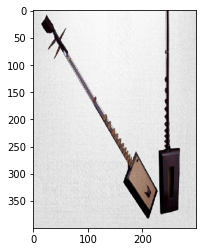

1/1 [==============================] - 0s 17ms/step
Song loan


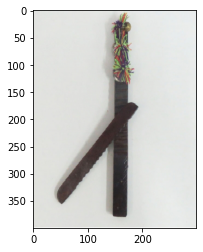

1/1 [==============================] - 0s 18ms/step
Dan tranh


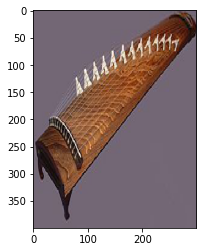

1/1 [==============================] - 0s 15ms/step
Senh tien


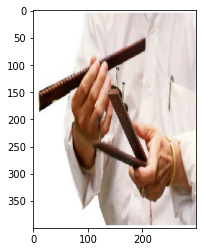

1/1 [==============================] - 0s 15ms/step
Dan doan


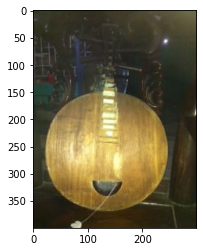

1/1 [==============================] - 0s 16ms/step
Dan doan


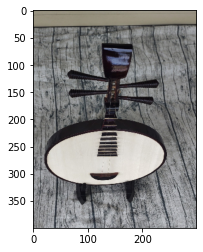

In [ ]:
test="/content/drive/MyDrive/P/Test"
import os
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(400,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_face.predict(img)
  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()
  